In [71]:
import pandas as pd
data_original = pd.read_csv("data_final.csv")

data = data_original

# Select a specific search query
data = data[data["search_query"].str.contains("2hollis type beat", na=False)]

In [72]:
# Split tags and explode
data_split = data
data_split["tags"] = data_split["tags"].str.split("|")
exploded = data.explode("tags")

# Calculate average views per tag
tag_stats = exploded.groupby("tags")["views"].mean().sort_values(ascending=False)

print(f"\nBased on {data.shape[0]} videos")
print(tag_stats)


Based on 252 videos
tags
free ken carson beat                 49826.5
flowrency                            49826.5
free 2hollis type beat 2024          49826.5
2hollis hard dance club type beat    47136.0
2hollis club                         38444.0
                                      ...   
fast edm type beat                     146.0
electronic dance type beat             146.0
synth heavy beat                       146.0
hyperpop edm type beat                 146.0
typebeat                                99.0
Name: views, Length: 711, dtype: float64


In [73]:
# Show total number of videos (rows in the original dataset)
total_videos = len(data)
print(f"Total number of videos: {total_videos}")

exploded = data_split.explode("tags")

# Count occurrences of each tag
tag_counts = exploded["tags"].value_counts()

# Display tag counts
print("Tag Occurrences:")
print(tag_counts.head())

# Set minimum frequency threshold
MIN_COUNT = 5

# Filter tags by minimum frequency
filtered_exploded = exploded[exploded["tags"].isin(tag_counts[tag_counts >= MIN_COUNT].index)].copy()  # Make a copy here

# Calculate weighted average views
# Use .loc[] to safely modify the dataframe and avoid SettingWithCopyWarning
filtered_exploded["weight"] = filtered_exploded["tags"].map(tag_counts)
filtered_exploded["weighted_views"] = filtered_exploded["views"] * filtered_exploded["weight"]

# Use .agg() instead of .apply() to calculate weighted average views per tag
tag_stats = (
    filtered_exploded.groupby("tags")
    .agg(weighted_avg_views=('weighted_views', 'sum'), total_weight=('weight', 'sum'))
    .reset_index()
)

# Calculate weighted average views for each tag
tag_stats["weighted_avg_views"] = tag_stats["weighted_avg_views"] / tag_stats["total_weight"]

# Sort by weighted average views
tag_stats = tag_stats.sort_values(by="weighted_avg_views", ascending=False)

# Print weighted averages
print("\nWeighted Average Views per Tag:")
print(tag_stats.head())



Total number of videos: 252
Tag Occurrences:
tags
2hollis type beat         210
free 2hollis type beat    125
2hollis type beat free    125
2hollis                   118
type beat                 115
Name: count, dtype: int64

Weighted Average Views per Tag:
                          tags  weighted_avg_views  total_weight
42        drain gang type beat             32676.0            25
2           2010 edm type beat             29693.5            36
146          yabujin type beat             29693.5            36
95   ken carson type beat 2024             27888.5           100
99       ken carson type beats             27436.0            25


## Channel Investigation

In [74]:
import pandas as pd

# Load data
data = pd.read_csv("data_final.csv")

# Show total number of videos (rows in the original dataset)
total_videos = len(data)
print(f"Total number of videos: {total_videos}")

# Count videos per channel
channel_counts = data["channel_name"].value_counts()

# Calculate percentage for each channel and round to 1 decimal
channel_percentage = (channel_counts / total_videos) * 100
channel_percentage = channel_percentage.round(1)

# Calculate average views per channel
average_views_per_channel = data.groupby("channel_name")["views"].mean()
average_views_per_channel = average_views_per_channel.round().astype(int)

# Combine counts, percentages, and average views into a DataFrame
channel_stats = pd.DataFrame({
    'video_count': channel_counts,
    'percentage': channel_percentage,
    'average_views': average_views_per_channel
})

# Sort the DataFrame by the percentage column in descending order
channel_stats = channel_stats.sort_values(by="percentage", ascending=False)

# Display the result
print(channel_stats)


Total number of videos: 252
                           video_count  percentage  average_views
channel_name                                                     
siem spark                          27        10.7           7404
tiresss / underrated club           19         7.5           6630
joalisho                            17         6.7           8611
+fiftyzeros                         14         5.6          15857
Klimlords Beats                      9         3.6          20290
...                                ...         ...            ...
tokyos1ze                            1         0.4           5597
twoclose                             1         0.4          38444
wag                                  1         0.4          14164
wtfbennie                            1         0.4          33049
wydastral                            1         0.4            669

[101 rows x 3 columns]


Correlation between duration (in seconds) and views: -0.112


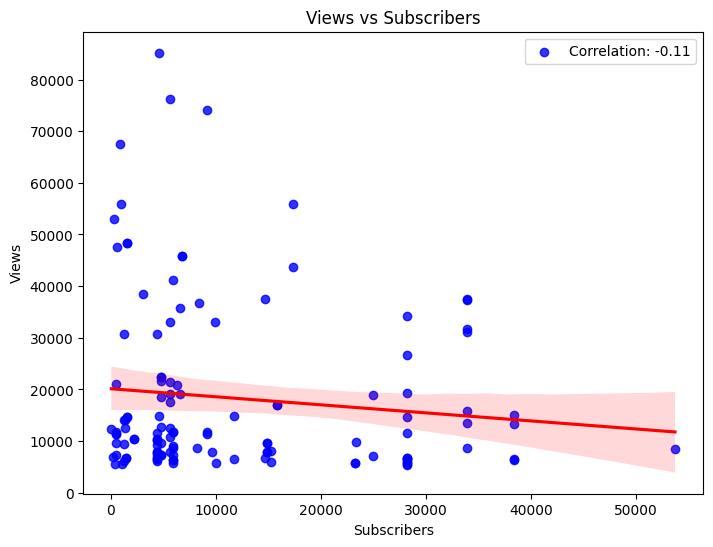

In [98]:
data_subs = data[(data['views'] > 5000)]

correlation = data_subs["subscribers"].corr(data_subs["views"])
print(f"Correlation between duration (in seconds) and views: {correlation:.3f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line (trendline)
plt.figure(figsize=(8, 6))
sns.regplot(data=data_subs, x="subscribers", y="views", scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add title and labels
plt.title("Views vs Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.legend([f'Correlation: {correlation:.2f}'], loc='best')

# Show the plot
plt.show()

## Title Research

In [75]:
# Compare "free" to "free for profit"

total_rows = len(data)

data["title_lower"] = data["title"].str.lower()

# Filter rows for each condition
free_rows = data[data["title_lower"].str.contains(r'\bfree\b(?! for profit)', regex=True)]
free_for_profit_rows = data[data["title_lower"].str.contains('free for profit')]
other_rows = data[~data["title_lower"].str.contains(r'\bfree\b', regex=True)]  # Exclude all "free" occurrences

# Calculate statistics for "free"
free_avg_views = free_rows['views'].mean()
free_std_views = free_rows['views'].std()
free_count = len(free_rows)
free_percentage = (free_count / total_rows) * 100

# Calculate statistics for "free for profit"
free_for_profit_avg_views = free_for_profit_rows['views'].mean()
free_for_profit_std_views = free_for_profit_rows['views'].std()
free_for_profit_count = len(free_for_profit_rows)
free_for_profit_percentage = (free_for_profit_count / total_rows) * 100

# Calculate statistics for "other"
other_avg_views = other_rows['views'].mean()
other_std_views = other_rows['views'].std()
other_count = len(other_rows)
other_percentage = (other_count / total_rows) * 100

# Create a summary DataFrame
summary_data = {
    "Average Views": [free_avg_views, free_for_profit_avg_views, other_avg_views],
    "Standard Deviation": [free_std_views, free_for_profit_std_views, other_std_views],
    "Count": [free_count, free_for_profit_count, other_count],
    "Percentage of Total (%)": [free_percentage, free_for_profit_percentage, other_percentage]
}

# Create DataFrame and set categories as index
summary_df = pd.DataFrame(summary_data, index=['free', 'free for profit', 'other'])

# Transpose the DataFrame (switch columns and rows)
summary_df = summary_df.T

# Round values
summary_df.loc['Average Views'] = summary_df.loc['Average Views'].round()
summary_df.loc['Standard Deviation'] = summary_df.loc['Standard Deviation'].round()
summary_df.loc['Count'] = summary_df.loc['Count'].astype(int)
summary_df.loc['Percentage of Total (%)'] = summary_df.loc['Percentage of Total (%)'].round(1)

# Drop the temporary lowercase column
data.drop(columns=["title_lower"], inplace=True)

# Print the transposed summary table
print(summary_df)


                            free  free for profit    other
Average Views             9768.0          11395.0   9463.0
Standard Deviation       14758.0          13556.0  14294.0
Count                      127.0             61.0     64.0
Percentage of Total (%)     50.4             24.2     25.4


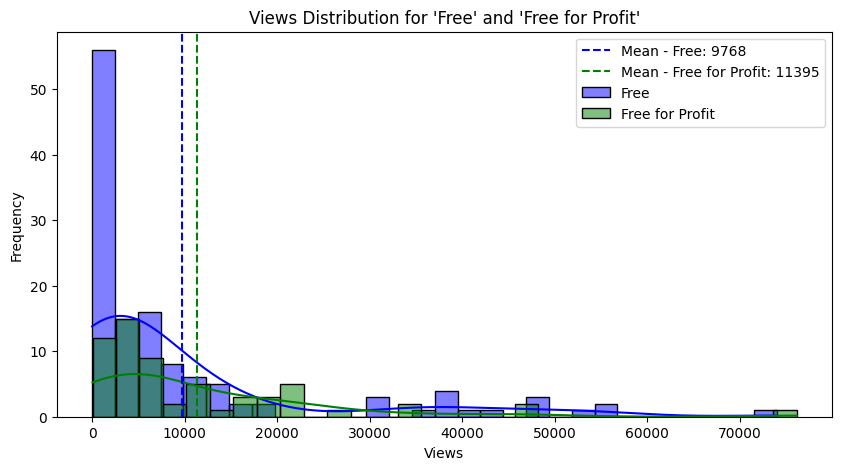

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means for each group
free_mean = free_rows['views'].mean()
free_for_profit_mean = free_for_profit_rows['views'].mean()

# Plot histograms to visualize the distribution of views
plt.figure(figsize=(10, 5))

# For "free"
sns.histplot(free_rows['views'], kde=True, color='blue', label='Free', bins=30)
# For "free for profit"
sns.histplot(free_for_profit_rows['views'], kde=True, color='green', label='Free for Profit', bins=30)

# Add a vertical dotted line at the mean for "free"
plt.axvline(free_mean, color='blue', linestyle='--', label=f'Mean - Free: {free_mean:.0f}')

# Add a vertical dotted line at the mean for "free for profit"
plt.axvline(free_for_profit_mean, color='green', linestyle='--', label=f'Mean - Free for Profit: {free_for_profit_mean:.0f}')

plt.legend()
plt.title("Views Distribution for 'Free' and 'Free for Profit'")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()


In [99]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(free_rows['views'], free_for_profit_rows['views'], equal_var=False)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


T-statistic: -0.748
P-value: 0.456


## Duration correlation with views

In [77]:
data_longform = data[data['duration_seconds'] > 60]

Correlation between duration and views: -0.037


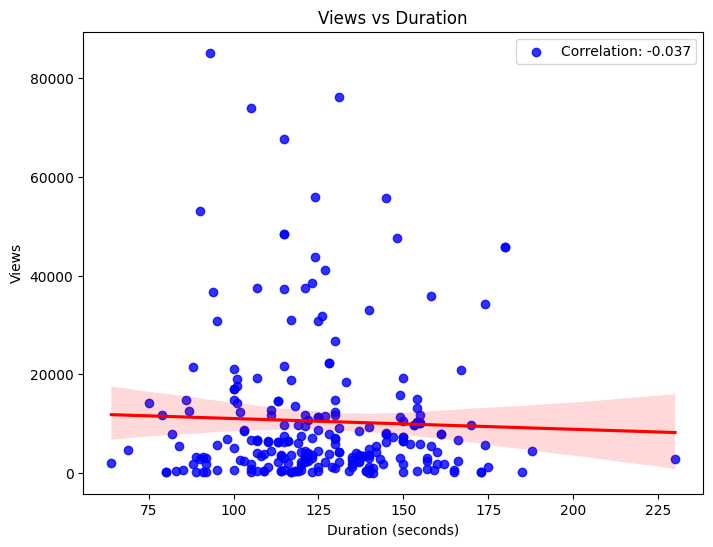

In [88]:
# Correlation duration with views
correlation = data_longform["duration_seconds"].corr(data_longform["views"])
print(f"Correlation between duration and views: {correlation:.3f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line (trendline)
plt.figure(figsize=(8, 6))
sns.regplot(data=data_longform, x="duration_seconds", y="views", scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add title and labels
plt.title("Views vs Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Views")
plt.legend([f'Correlation: {correlation:.3f}'], loc='best')

# Show the plot
plt.show()

In [89]:
spearman_corr = data_longform["duration_seconds"].corr(data_longform["views"], method="spearman")
print(f"Spearman Correlation: {spearman_corr:.3f}")


Spearman Correlation: -0.016


Correlation between duration (in seconds) and views: -0.101


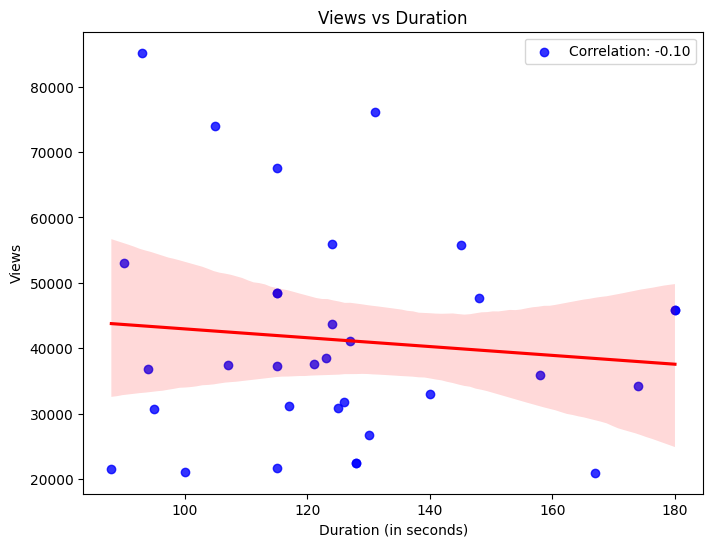

In [86]:
# Correlation duration with views
data_longform_highviews = data_longform[data_longform['views'] > 20000]

correlation = data_longform_highviews["duration_seconds"].corr(data_longform_highviews["views"])
print(f"Correlation between duration (in seconds) and views: {correlation:.3f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line (trendline)
plt.figure(figsize=(8, 6))
sns.regplot(data=data_longform_highviews, x="duration_seconds", y="views", scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add title and labels
plt.title("Views vs Duration")
plt.xlabel("Duration (in seconds)")
plt.ylabel("Views")
plt.legend([f'Correlation: {correlation:.2f}'], loc='best')

# Show the plot
plt.show()